<a href="https://colab.research.google.com/github/Anu-jo/week3/blob/main/data_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
import sklearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df=pd.read_csv('Dry_Bean_Dataset.csv')
#data encoding
from sklearn.preprocessing import OneHotEncoder
oe_style = OneHotEncoder()


In [ ]:
oe_results = oe_style.fit_transform(df[["Class"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
df = df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))


In [ ]:
y = df['Class']#dependent variable
X = df.drop(['Class'], axis = 1)#independent variable
#over sampling
ros = RandomOverSampler(random_state=42)
# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))
#data standardization
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
 # standardization
X_std = object.fit_transform(x_ros)
print(X_std)


Original dataset shape Counter({'DERMASON': 3546, 'SIRA': 2636, 'SEKER': 2027, 'HOROZ': 1928, 'CALI': 1630, 'BARBUNYA': 1322, 'BOMBAY': 522})
Resample dataset shape Counter({'SEKER': 3546, 'BARBUNYA': 3546, 'BOMBAY': 3546, 'CALI': 3546, 'HOROZ': 3546, 'SIRA': 3546, 'DERMASON': 3546})
[[-0.90014718 -1.21755861 -1.34951635 ... -0.40824829  2.44948974
  -0.40824829]
 [-0.89281612 -1.12426241 -1.41600032 ... -0.40824829  2.44948974
  -0.40824829]
 [-0.87884601 -1.17106025 -1.30913932 ... -0.40824829  2.44948974
  -0.40824829]
 ...
 [-0.55379225 -0.62976596 -0.59098978 ... -0.40824829 -0.40824829
   2.44948974]
 [-0.64565762 -0.67306439 -0.5451123  ... -0.40824829 -0.40824829
   2.44948974]
 [-0.49769556 -0.50762657 -0.46097801 ... -0.40824829 -0.40824829
   2.44948974]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


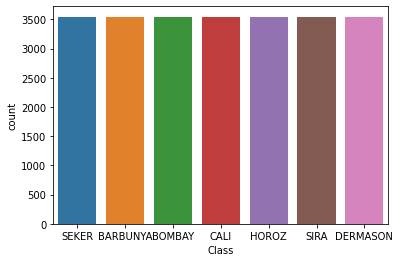

In [ ]:
g = sns.countplot(df['Class'])
g_os = sns.countplot(y_ros)
g.set_xticklabels(['SEKER','BARBUNYA','BOMBAY','CALI','HOROZ','SIRA','DERMASON'])
plt.show()

[ 41.37058826  66.01274429  73.39319141  79.35723872  84.76130156
  89.89360409  94.3246526   97.3955138   98.32698219  99.10044982
  99.45612811  99.69587299  99.87140519  99.96350408  99.99192491
  99.99622193  99.99859911  99.99941634  99.9999393   99.99998533
  99.99999314 100.         100.        ]


Text(0, 0.5, 'Explained variance(%)')

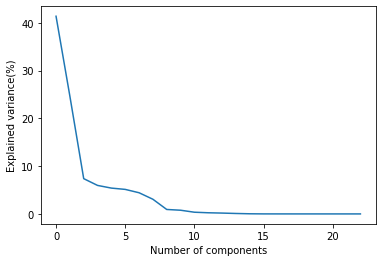

In [ ]:
#dimensionality reduction using PCA
from sklearn.model_selection import train_test_split# model for splitting the data
# we split 80% of the data for model training and 30% accuracy model testing
XTrain, XTest, YTrain, YTest = train_test_split(X_std, y_ros, test_size = 0.2, random_state = 100)
#PCA calculation
pca=PCA()
XTrain_pca=pca.fit_transform(XTrain)
XTest_pca=pca.transform(XTest)
#print(pca.explained_variance_ratio_*100)
cum_sum_pca=np.cumsum(pca.explained_variance_ratio_*100)
print(cum_sum_pca)
plt.plot(pca.explained_variance_ratio_*100)
plt.xlabel('Number of components')
plt.ylabel('Explained variance(%)')


Text(0, 0.5, 'Cumulative Explained variance(%)')

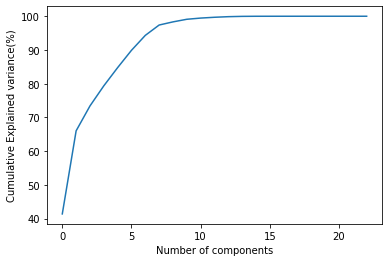

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance(%)')


In [ ]:
#taking 95% of varaiance contributed components
pca_95=PCA(n_components=0.95)
X_pca_95=pca_95.fit_transform(X_std)
print(X_pca_95.shape)
#creating new dataset that is dimensionally reduced
df_new=pd.DataFrame(X_pca_95,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
df_new['Class']=y_ros
print(df_new.head())
#df_new.to_csv('Drybeans_95.csv',index=False)
y_new = df_new['Class']#dependent variable
X_new = df_new.drop(['Class'], axis = 1)#independent variable


(24822, 8)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -5.380244 -2.715643  0.384565 -0.035578  1.756156  0.220418  0.437295   
1 -5.806259 -3.659385  1.620781  0.038155  1.925724  0.396634  0.961672   
2 -5.188989 -2.674861  0.290593 -0.055578  1.690404  0.155996  0.198417   
3 -4.883943 -2.718076  2.215966  0.765062  1.844107  0.608249  1.909725   
4 -6.526379 -4.787345  0.700941 -0.068169  2.124589  0.296540  0.668834   

        PC8  Class  
0  0.028266  SEKER  
1  0.453165  SEKER  
2  0.263911  SEKER  
3  0.792478  SEKER  
4 -0.081584  SEKER  


In [ ]:
from sklearn.preprocessing import OneHotEncoder
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df_new[["Class"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
df_new = df_new.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))

In [ ]:
# standardization
X_std = object.fit_transform(X_new)
print(X_std)

[[-1.74657343 -1.13905135  0.29395568 ...  0.20182571  0.43493656
   0.03352367]
 [-1.88486928 -1.53489494  1.23890035 ...  0.36317795  0.95648628
   0.53745862]
 [-1.68448677 -1.1219457   0.22212504 ...  0.1428375   0.19734704
   0.31300184]
 ...
 [-0.55841264  0.01356457 -0.81753379 ... -2.13156404  0.29939739
   1.63157136]
 [-0.31609155  0.9072626  -0.54200881 ... -1.97897949  0.89006751
   0.19421387]
 [-0.35460843  0.41530259 -0.2684994  ... -1.96192449  1.12120742
  -0.28810601]]


In [ ]:
from sklearn.model_selection import train_test_split# model for splitting the data
# we split 80% of the data for model training and 20% accuracy model testing
XTrain, XTest, YTrain, YTest = train_test_split(X_std, y_new, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Calling the Class
naive_bayes = GaussianNB()

#Fitting the data to the classifier
naive_bayes.fit(XTrain , YTrain)

#Predict on test data
y_predicted = naive_bayes.predict(XTest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
print('Accuracy score:')
accuracy_score=accuracy_score(y_predicted , YTest)
accuracy_score


Accuracy score:


0.9981873111782478

In [ ]:
cm=confusion_matrix(YTest, y_predicted)
cm

array([[743,   0,   1,   0,   0,   0,   0],
       [  0, 710,   0,   0,   0,   0,   0],
       [  0,   0, 652,   0,   3,   0,   0],
       [  0,   0,   0, 690,   2,   0,   0],
       [  0,   0,   0,   0, 743,   0,   0],
       [  0,   0,   0,   0,   2, 664,   0],
       [  0,   0,   1,   0,   0,   0, 754]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


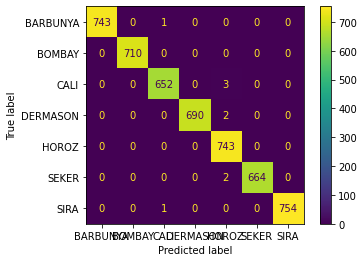

In [ ]:
plot_confusion_matrix(naive_bayes,XTest,YTest)

In [ ]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="entropy", random_state=42,max_depth=3, min_samples_leaf=7)
clf_model.fit(XTrain,YTrain)
y_predict = clf_model.predict(XTest)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
accuracy_score(YTest,y_predict)


0.9945619335347432

In [ ]:
confusion_matrix(YTest,y_predict)

array([[737,   3,   4,   0,   0,   0,   0],
       [  7, 702,   1,   0,   0,   0,   0],
       [  0,   2, 648,   0,   5,   0,   0],
       [  0,   0,   0, 692,   0,   0,   0],
       [  0,   0,   3,   0, 740,   0,   0],
       [  0,   0,   0,   0,   0, 666,   0],
       [  0,   0,   2,   0,   0,   0, 753]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


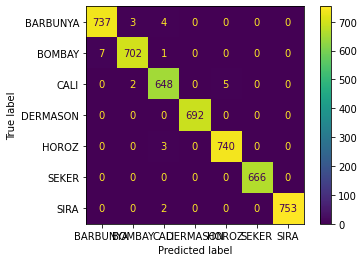

In [ ]:
plot_confusion_matrix(clf_model,XTest,YTest)

In [ ]:
#SVM classifier
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma=0.01, C=1000)
clf.fit(XTrain, YTrain)
predictions = clf.predict(XTest)
accuracy_score(YTest, predictions)

1.0

In [ ]:
confusion_matrix(YTest,predictions)

array([[744,   0,   0,   0,   0,   0,   0],
       [  0, 710,   0,   0,   0,   0,   0],
       [  0,   0, 655,   0,   0,   0,   0],
       [  0,   0,   0, 692,   0,   0,   0],
       [  0,   0,   0,   0, 743,   0,   0],
       [  0,   0,   0,   0,   0, 666,   0],
       [  0,   0,   0,   0,   0,   0, 755]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


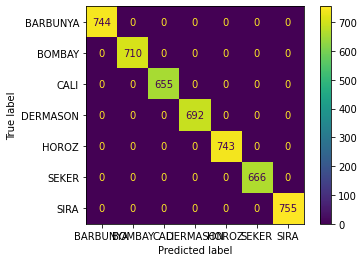

In [ ]:
plot_confusion_matrix(clf,XTest,YTest)